**VISUALIZATION AND PREDICTION OF USA VISA APPLICATION BY USING MACHINE LEARNING TECHNIQUES.**


**AUTHOR: JOSHUA SACKEY & BLAISE AYIRIZIA (GROUP 9)**

In [1]:
#importing libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline
# Reset TF and random seed (for reproducible results).
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Input data files are available in the "../input/" directory.
from subprocess import check_output
print(check_output(["ls", "us_perm_visas.csv"]).decode("utf8"))

/home/joshua/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/joshua/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/tmp/ipykernel_4751/1013195902.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/lib/python3/dist-packages/scipy/__init

us_perm_visas.csv



In [2]:
# Exploratory of Datasets

df = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])

**UNDERSTANDING/EXPLORATION OF THE DATASET**

In [3]:
# Displaying number of rows and columns
print('Number of Visa Applications:', len(df))
print('Number of Columns:', len(df.columns))

Number of Visa Applications: 374362
Number of Columns: 154


In [3]:
# Displaying 5 first rows and last 5 rows
print("The first 5 rows:", df.head())
print("The last 5 rows:", df.tail())

The first 5 rows:   add_these_pw_job_title_9089 agent_city agent_firm_name agent_state  \
0                         NaN        NaN             NaN         NaN   
1                         NaN        NaN             NaN         NaN   
2                         NaN        NaN             NaN         NaN   
3                         NaN        NaN             NaN         NaN   
4                         NaN        NaN             NaN         NaN   

  application_type        case_no case_number case_received_date case_status  \
0             PERM  A-07323-97014         NaN                NaT   Certified   
1             PERM  A-07332-99439         NaN                NaT      Denied   
2             PERM  A-07333-99643         NaN                NaT   Certified   
3             PERM  A-07339-01930         NaN                NaT   Certified   
4             PERM  A-07345-03565         NaN                NaT   Certified   

  class_of_admission  ... ri_pvt_employment_firm_to ri_us_workers_co

In [4]:
#display attributes in the dataset.
print(df.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

Since there are two(2) attributes that may contain similar information - **case_number** & **case_no  **- let's check their lenghts, number of missing values and example values.

In [5]:
# Checking length of case_number and case_no

print("Length of 'case_number' column is: ", len(df['case_number'])," with",df.case_number.isnull().sum(), "missing values")
print("Length of 'case_no' column is: ", len(df['case_no'])," with", df.case_no.isnull().sum(),"missing values \n")

print("First 2 values of case_number column are : \n", df['case_number'].head(2),"\n")

print("Last 2 values of case_number column are : \n", df['case_number'].tail(2), "\n")
print("First 2 values of case_no column are : \n", df['case_no'].head(2), "\n")
print("Last 2 values of case_no column are : \n", df['case_no'].tail(2))

Length of 'case_number' column is:  374362  with 135269 missing values
Length of 'case_no' column is:  374362  with 239093 missing values 

First 2 values of case_number column are : 
 0    NaN
1    NaN
Name: case_number, dtype: object 

Last 2 values of case_number column are : 
 374360    A-16357-84250
374361    A-16279-59292
Name: case_number, dtype: object 

First 2 values of case_no column are : 
 0    A-07323-97014
1    A-07332-99439
Name: case_no, dtype: object 

Last 2 values of case_no column are : 
 374360    NaN
374361    NaN
Name: case_no, dtype: object


As we supposed, these columns contain similar values and their "NaN" 
values add up to the total number of observations so let's create new column containing 
only non missing values from both "case_number" and "case_no" columns and then we will remove them.

In [6]:
# Creating new columns containing non missing values from both "case_number" and "case_no"

casenoindex = df.columns.get_loc("case_no")
casenumberindex = df.columns.get_loc("case_number")
casenumberlist = []

for value in df.iloc[0:135269,casenoindex]:
    casenumberlist.append(value)
    
for value in df.iloc[135269:374363,casenumberindex]:
    casenumberlist.append(value)
    
df['casenumber'] = casenumberlist
df.drop(df.columns[[casenoindex,casenumberindex]], axis=1, inplace=True)

In [7]:
#Printing number of unique values for 'case_status' column

for value in df.case_status.unique():
    print(len(df[df['case_status'] == value])," occurrences of status '{}'".format(value))

181933  occurrences of status 'Certified'
25649  occurrences of status 'Denied'
148586  occurrences of status 'Certified-Expired'
18194  occurrences of status 'Withdrawn'


In [8]:
#Removing all withdrawn applications
df = df[df.case_status != 'Withdrawn']

#Combining certified-expired and certified applications and displaying distribution of "case_status" variable
df.loc[df.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
df.case_status.value_counts()

case_status
Certified    330519
Denied        25649
Name: count, dtype: int64

In [9]:
# Percentage of case_status.

df['case_status'].value_counts()/len(df)*100

case_status
Certified    92.798623
Denied        7.201377
Name: count, dtype: float64

it's interesting that only 7% of Visa applications were denied. Now, let's perform dimensionality reduction by removing rows and columns containing only 'NaN' values and check the dataframe's shape

In [10]:
#Dropping all empty columns
df = df.dropna(axis=1, how='all');

#Dropping all empty rows
df = df.dropna(axis=0, how='all');

df.shape

(356168, 153)

In [11]:
# Displaying number of missing values in each column
for column in df.columns:
    print("Attribute '{}' contains ".format(column),  df[column].isnull().sum().sum(), " missing values")

Attribute 'add_these_pw_job_title_9089' contains  317031  missing values
Attribute 'agent_city' contains  153452  missing values
Attribute 'agent_firm_name' contains  157646  missing values
Attribute 'agent_state' contains  156544  missing values
Attribute 'application_type' contains  229320  missing values
Attribute 'case_received_date' contains  126848  missing values
Attribute 'case_status' contains  0  missing values
Attribute 'class_of_admission' contains  21085  missing values
Attribute 'country_of_citizenship' contains  19272  missing values
Attribute 'country_of_citzenship' contains  336951  missing values
Attribute 'decision_date' contains  0  missing values
Attribute 'employer_address_1' contains  37  missing values
Attribute 'employer_address_2' contains  236133  missing values
Attribute 'employer_city' contains  10  missing values
Attribute 'employer_country' contains  126920  missing values
Attribute 'employer_decl_info_title' contains  126886  missing values
Attribute 'em

**VISUALIZATION OF THE UNPROCESSED DATA.**


Before removing columns which consist mostly of missing values, let's create a new column containing only the year of Visa application submission and perform some visualisation in order to derive initial insights.

[Text(0.5, 0, 'Visa application year'),
 Text(0, 0.5, 'Number of Visa applicatons')]

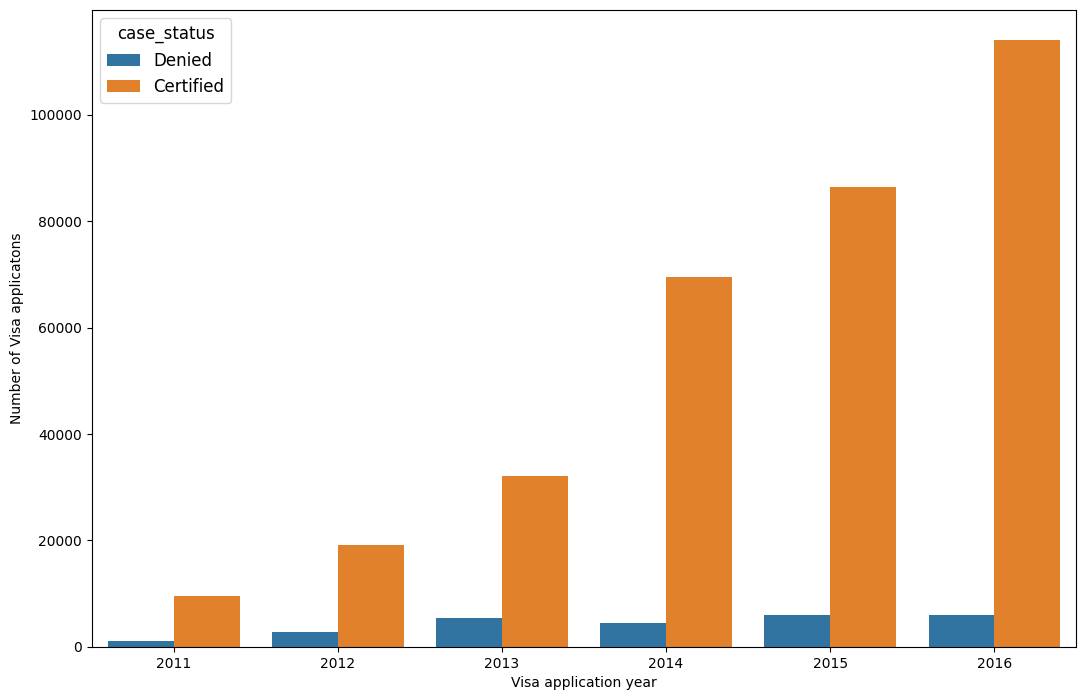

In [12]:
#Converting the date to contain just the year of application submission
df['year'] = df['decision_date'].dt.year

#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12})
sns.countplot(x="year", hue="case_status", data=df)
ax.set(xlabel='Visa application year', ylabel='Number of Visa applicatons')

As we can observe, the number of submitted Visa applications increases every year. It's interesting that while the number of positively considered applications increases, the number of "Denied" ones seems to be similar from year 2013. As a next step, let's see, what where the most popular cities.

In [13]:
# Displaying 15 most popular cities
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].value_counts().head(15)

employer_city
NEW YORK           17198
COLLEGE STATION    11985
SANTA CLARA        10519
SAN JOSE            9147
REDMOND             8485
MOUNTAIN VIEW       8121
HOUSTON             6720
SAN FRANCISCO       6352
SUNNYVALE           6104
PLANO               5607
CHICAGO             5561
SEATTLE             5051
EDISON              4056
LOS ANGELES         4045
SAN DIEGO           3702
Name: count, dtype: int64

[Text(0.5, 0, 'Employer city'), Text(0, 0.5, 'Number of Visa applications')]

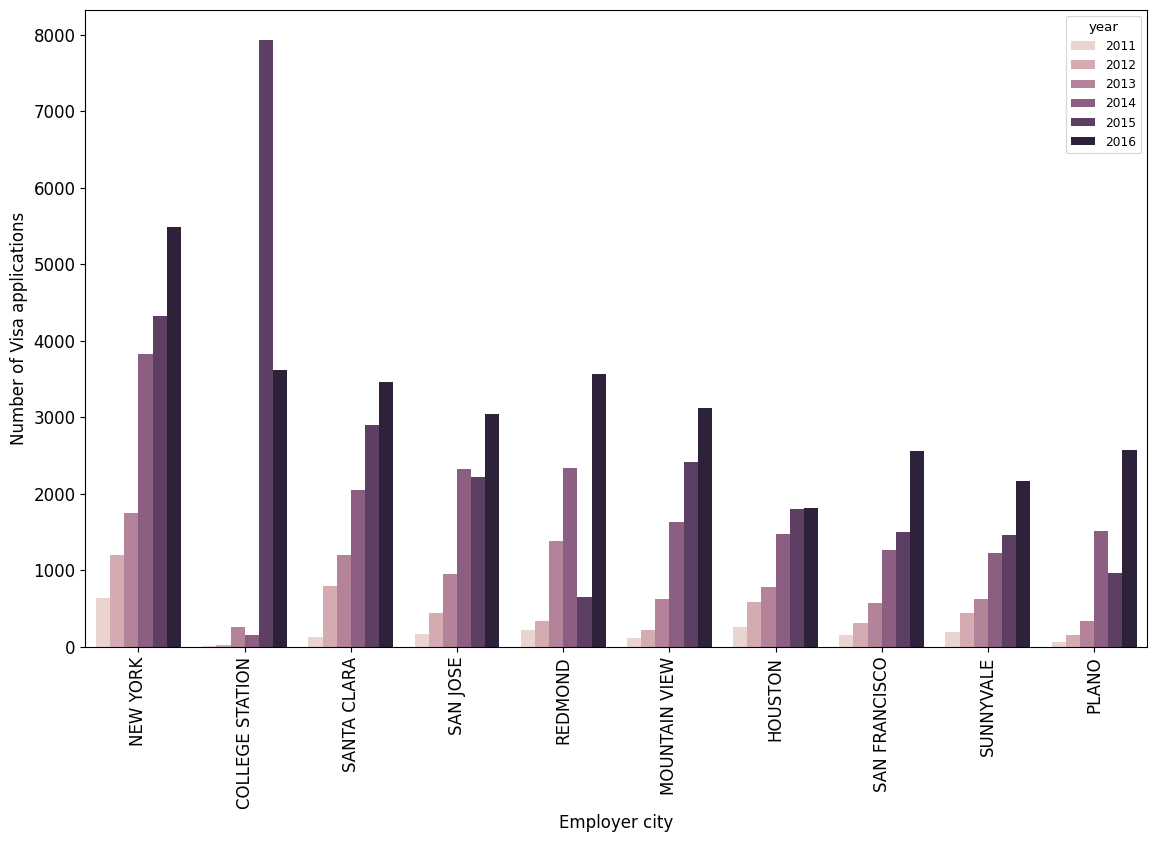

In [14]:
# Creating plot parameters for the cities
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='employer_city', hue='year', data=df, order=df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')

From the diagram, we can see that the most popular destination cities were: New York, College Station, Santa Clara, San Jose, Redmond, Mountain View, Houston, SunnyVale, San Francisco and Plano. In most of the cities there was a positive trend in Visa applications. A bizarre situation occured in College Station in 2015 where the number of submitted Visa applications was more or less twice large as in other cities.

Now, let's take a look what were the most hiring employers and economic sectors through these years. For "us_economic_sector" variable we have only 120 868 non-missing values, but this should give us an insight.

/tmp/ipykernel_4751/2407200387.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employer_name', data=df,
/tmp/ipykernel_4751/2407200387.py:9: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='employer_name', data=df,


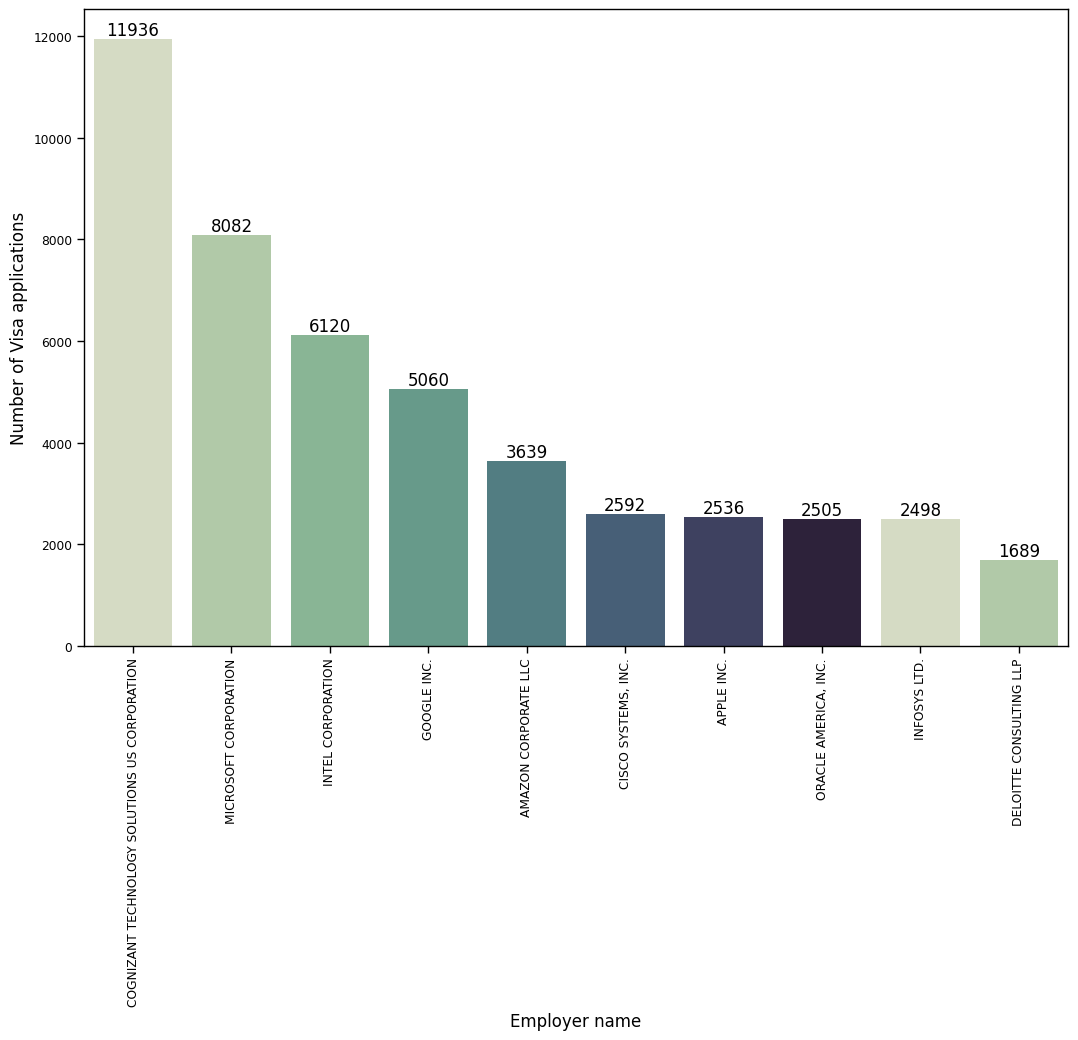

In [15]:
# Create plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size": 12, "axes.labelsize": 13})

# Ensure 'df' contains the dataset
# Ensure 'employer_name' column exists in 'df'
# Create the countplot
sns.countplot(x='employer_name', data=df, 
              palette=sns.cubehelix_palette(8, start=.5, rot=-.75), 
              order=df['employer_name'].value_counts().iloc[:10].index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Iterate over elements in "employer_name" column and display counts above bars
for i, v in df['employer_name'].value_counts().head(10).items():
    ax.text(i, v, str(v), ha='center', va='bottom')

# Set labels for axes
ax.set(xlabel='Employer name', ylabel='Number of Visa applications')

# Show the plot
plt.show()


As we can see, 9 out of 10 most beneficial companies for Visa applicants are IT industry representatives. This leads to the assumption that IT sector is both most favourable and demanding one in United States. Let's check what is the distribution of industries across all Visa applications.

In [16]:
#let's take a look at the most desired job titles, citizenships and class of admission of our Visa applicants.

df['job_info_job_title'].value_counts()[:20]

job_info_job_title
Software Engineer                   14372
Computer Systems Analyst - V         4747
Senior Software Engineer             3801
Computer Systems Analyst - II        3416
Software Developer                   2880
Assistant Professor                  2604
Programmer Analyst                   2534
Computer Systems Analyst - IV        2496
Systems Analyst                      2034
Software Development Engineer II     1630
Poultry Processing Worker            1594
Component Design Engineer            1064
Poultry Processor                    1037
Business Analyst                      963
software engineer                     932
SOFTWARE ENGINEER                     877
Senior Programmer Analyst             862
Sr. Software Engineer                 847
Senior Software Developer             817
Commercial Cleaner                    802
Name: count, dtype: int64

Since our column contains job titles with different letter casing we need to standarize them so that value_counts() method will be able to count them more appropriately. Also, there are lots of same positions like "Computer Systems Analyst" which differ only by the number standing after hyphen so we will split these titles by finding the '-', 'ii' and '/' signs and leaving only the left side of the splitting result. Afterwards, we are going to remove leading and ending spaces, replace "sr." with "senior" values and get rid of 'nan's.

In [17]:
#Standardization of casing for letters.
#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df['job_info_job_title'].value_counts(dropna=True)[:10]

/tmp/ipykernel_4751/1775668740.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


job_info_job_title
Software Engineer                   15398
Computer Systems Analyst            11937
Senior Software Engineer             4545
Software Developer                   3788
Assistant Professor                  2740
Programmer Analyst                   2733
Systems Analyst                      2146
Software Development Engineer II     1772
Poultry Processing Worker            1594
Business Analyst                     1292
Name: count, dtype: int64

/tmp/ipykernel_4751/86349603.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_info_job_title', data=df,


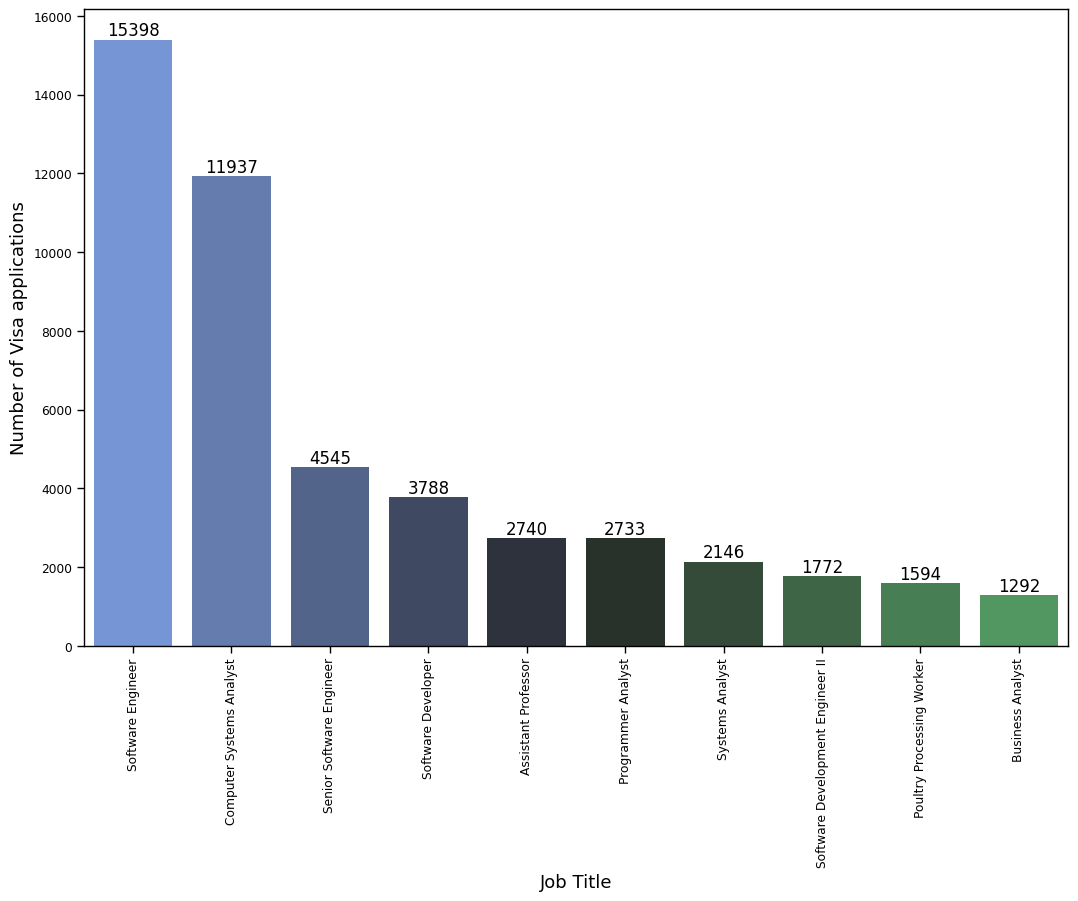

In [18]:
# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)

# Create the countplot
sns.countplot(x='job_info_job_title', data=df, 
              palette=sns.diverging_palette(255, 133, l=60, n=10, center="dark"), 
              order=df['job_info_job_title'].value_counts().iloc[:10].index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Iterate over elements in "job_info_job_title" column and display counts above bars
for i, v in df['job_info_job_title'].value_counts().head(10).items():
    ax.text(i, v, str(v), ha='center', va='bottom')

# Set labels for axes
ax.set(xlabel='Job Title', ylabel='Number of Visa applications')

# Show the plot
plt.show()


Interestingely, all of the most popular positions except "assistant professor" are derived from the IT industry. This is another confirmation that there is a huge demand for IT specialists in USA and being one of them increases our chances to obtain a permanent Visa.

/tmp/ipykernel_4751/472064380.py:7: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x='country_of_citizenship', hue='case_status', data=df,


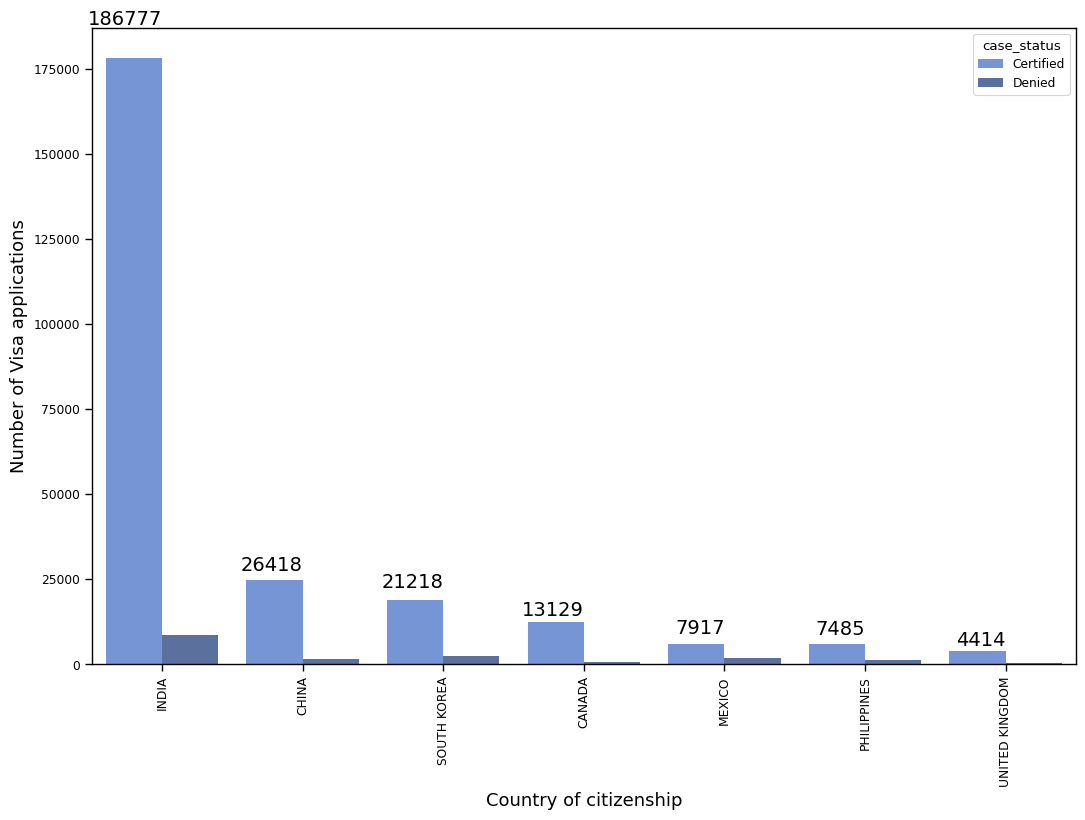

In [19]:
# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size": 14, "axes.labelsize": 12})

# Create the countplot with hue for 'case_status'
sns.countplot(x='country_of_citizenship', hue='case_status', data=df, 
              palette=sns.diverging_palette(255, 133, l=60, n=7, center="dark"), 
              order=df['country_of_citizenship'].value_counts().iloc[:7].index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Iterate over elements in "country_of_citizenship" column and display counts above bars 
for i, v in df['country_of_citizenship'].value_counts().head(7).items():
    ax.text(i, v, str(v), ha='right', va='bottom')

# Set labels for axes
ax.set(xlabel='Country of citizenship', ylabel='Number of Visa applications')

# Show the plot
plt.show()

As we can see, the majority of Visa applications has been submitted by Indian citizens. They constitute to more than half of our observations, we can assume that most of them are computer specialists.

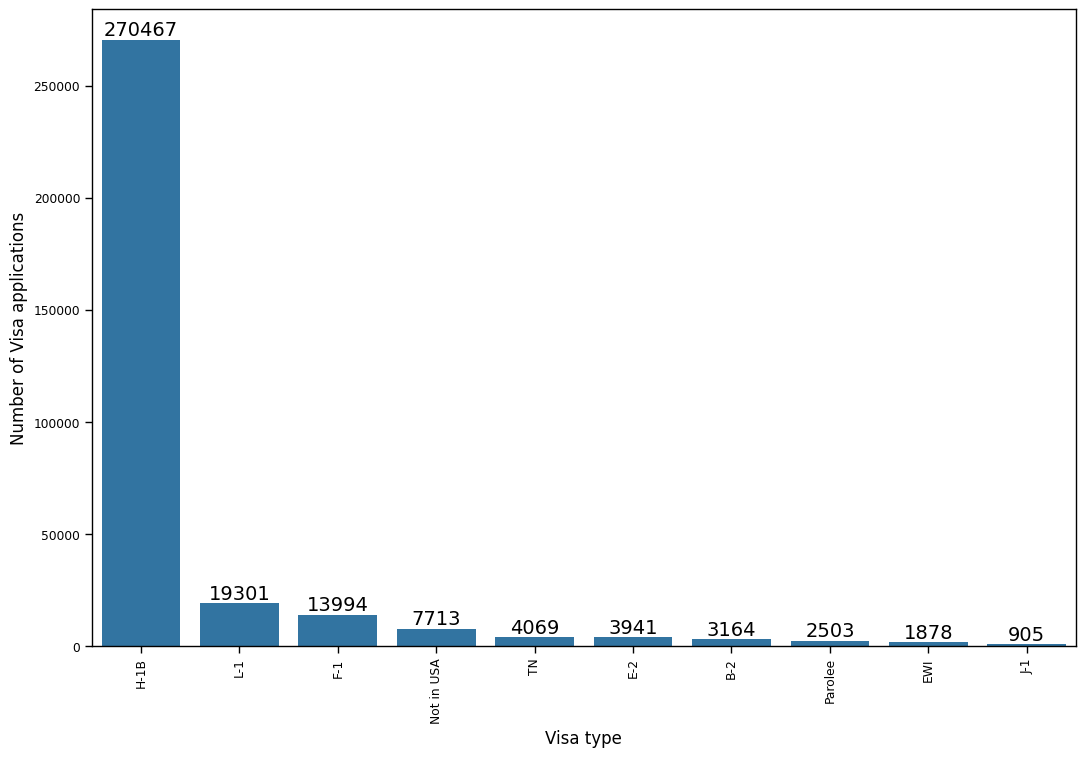

In [20]:
# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)

# Create the countplot
sns.countplot(x='class_of_admission', data=df, 
              order=df['class_of_admission'].value_counts().iloc[:10].index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Iterate over elements in "class_of_admission" column and display counts above bars 
for i, v in df['class_of_admission'].value_counts().head(10).items():
    ax.text(i, v, str(v), ha='center', va='bottom')

# Set labels for axes
ax.set(xlabel='Visa type', ylabel='Number of Visa applications')

# Show the plot
plt.show()

The vast majority of petitioners were applying for the H-1B Visa, which according to the Wikipedia, allows U.S. employers to employ foreign workers in specialty occupations. 


Finally, let's try checking on the number and kind of application types. Unfortunately, our data consists only of 126 848 non-missing values for this attribute, but this should give us a general overview.

/tmp/ipykernel_4751/1692960543.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='application_type', data=df, palette=sns.color_palette("GnBu_d"),
/tmp/ipykernel_4751/1692960543.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x='application_type', data=df, palette=sns.color_palette("GnBu_d"),


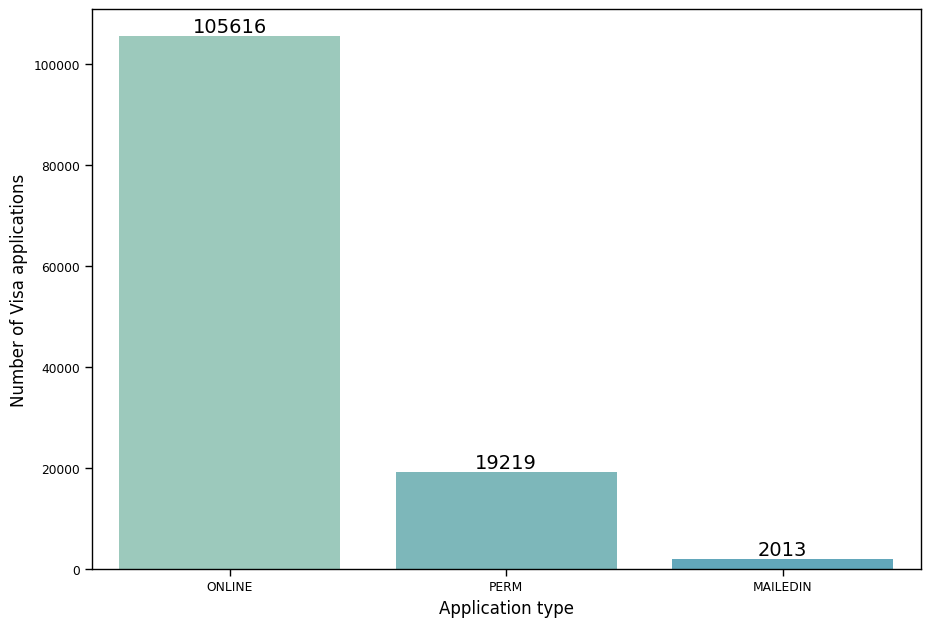

In [21]:
# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(10.7, 7.27)

# Create the countplot
sns.countplot(x='application_type', data=df, palette=sns.color_palette("GnBu_d"), 
              order=df['application_type'].value_counts().iloc[:10].index)

# Iterate over elements in "application_type" column and display counts above bars 
for i, v in df['application_type'].value_counts().head(10).items():
    ax.text(i, v, str(v), ha='center', va='bottom')

# Set labels for axes
ax.set(xlabel='Application type', ylabel='Number of Visa applications')

# Show the plot
plt.show()


/tmp/ipykernel_4751/1698612970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='foreign_worker_info_education', data=df,
/tmp/ipykernel_4751/1698612970.py:6: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.countplot(x='foreign_worker_info_education', data=df,


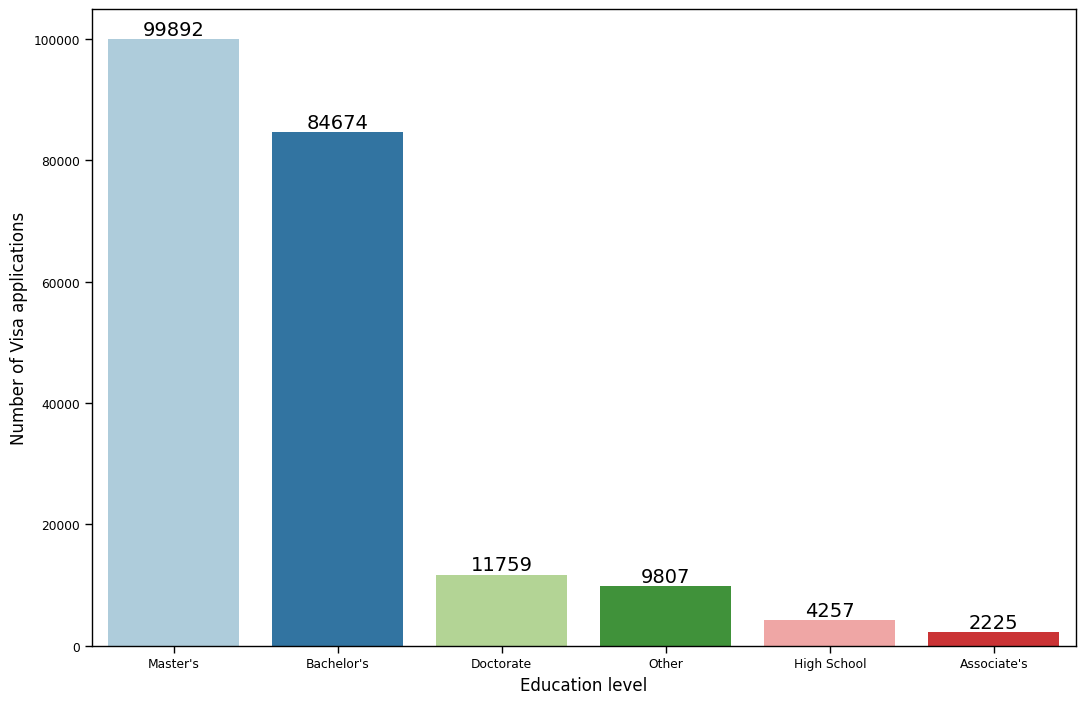

In [22]:
# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)

# Create the countplot
sns.countplot(x='foreign_worker_info_education', data=df, 
              palette=sns.color_palette("Paired"), 
              order=df['foreign_worker_info_education'].value_counts().iloc[:10].index)

# Iterate over elements in "foreign_worker_info_education" column and display counts above bars 
for i, v in df['foreign_worker_info_education'].value_counts().head(10).items():
    ax.text(i, v, str(v), ha='center', va='bottom')

# Set labels for axes
ax.set(xlabel='Education level', ylabel='Number of Visa applications')

# Show the plot
plt.show()

As we can see, over 50% of applicants obtained a university degree. Before plotting the remuneration, we will remove commas from the values so that they are left only with decimal places denoted. Also, since some of the wages are hourly, weekly, bi-weekly and monthly values, we have to calculate the yearly equivalents for them. According to the https://www.timeanddate.com/date/workdays.html website, the average number of working days in USA is 250. We will use this information in our calculations.

In [25]:
#Displaying some payment amounts
df[['pw_amount_9089','pw_unit_of_pay_9089']].head(10)

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.0,yr
1,37024.0,yr
2,47923.0,yr
3,10.97,hr
4,94890.0,yr
5,37024.0,yr
6,47083.33,yr
7,36733.0,yr
8,44824.0,yr
9,12.86,hr


In [26]:
#Replacing commas with whitespace character
df['pw_amount_9089'] = df['pw_amount_9089'].str.replace(",","") 

for unit in df.pw_unit_of_pay_9089.unique():
    if unit == "hr" or unit == "Hour":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "wk" or unit == "Week":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 50)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "mth" or unit == "Month":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 12)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "bi" or unit == "Bi-Weekly":  
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 25)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit =="yr":
         df.loc[df['pw_unit_of_pay_9089'] == unit ,'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue

# Convert 'pw_amount_9089' column to numeric, coercing errors to NaN
df['pw_amount_9089'] = pd.to_numeric(df['pw_amount_9089'], errors='coerce')
 
#Filling missing values with median 
df['pw_amount_9089']= df['pw_amount_9089'].fillna((df['pw_amount_9089'].median()))

#Changing format from string to float
df['pw_amount_9089'] = df.pw_amount_9089.astype(float)

#Displaying 10 first values
df[['pw_amount_9089','pw_unit_of_pay_9089']].head(10)

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.00,Year
1,37024.00,Year
2,47923.00,Year
3,21940.00,Year
4,94890.00,Year
5,37024.00,Year
6,47083.33,Year
7,36733.00,Year
8,44824.00,Year
9,25720.00,Year


In [27]:
#Since running "describe" method on "pw_amount_9089" column returned exponential values, I decided to 
#convert them to floats so that they are easier to understand
with pd.option_context('float_format', '{:.2f}'.format): print(df.pw_amount_9089.describe())

count      356168.00
mean       469624.51
std       7679620.28
min             7.50
25%         67808.00
50%         86278.00
75%        104790.00
max     495748000.00
Name: pw_amount_9089, dtype: float64


In [28]:
#Dividing our continuous income values into some categories to facilitate their visualization
df['remuneration'] = pd.cut(df['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = df['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

remuneration
0-30k        19810
30-60k       47493
60-90k      133050
90-120k     112631
120-150k     30532
150-180k      7094
180-210k      3801
210-240k       604
240-270k        29
270k+         1123
Name: count, dtype: int64

/tmp/ipykernel_4751/1115180340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='remuneration', data=df, kind="count",


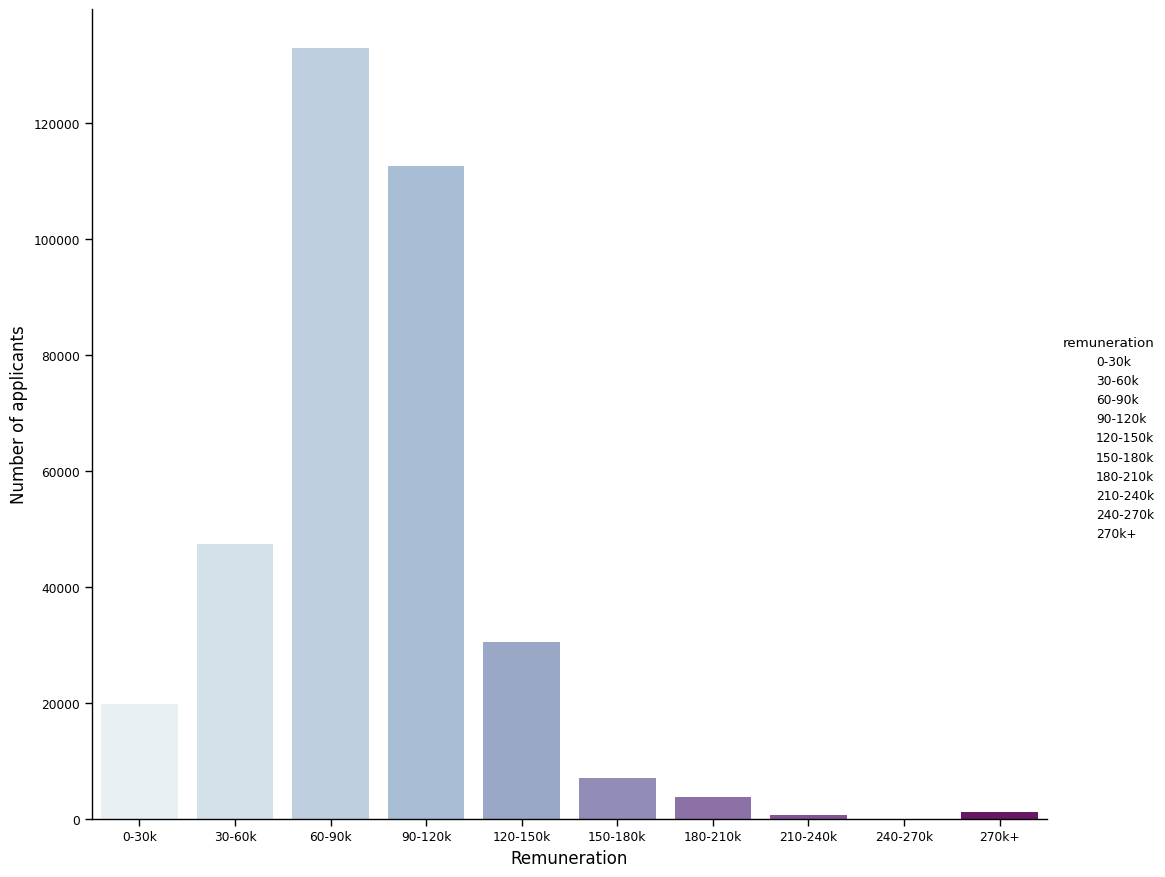

In [30]:
# Draw a count plot to show the distribution of remunerations
g = sns.catplot(x='remuneration', data=df, kind="count",
                palette="BuPu", height=9, aspect=1.2)

# Set labels
g.set(xlabel='Remuneration', ylabel='Number of applicants')

As we can see, over 65% of the applicants earn between 60 and 120 thousand dollars yearly. From this moment, we will start working on the feature selection and data cleansing.

**FEATURE SELECTION AND DATA CLEANING**

In [31]:
#Displaying percentage of non-null values for each feature
i = 0;
for col in df.columns:
    i = i+1;
    print (i-1,"Column: '{}'".format(col),"contains ", np.round(100*df[col].count()/len(df['case_status']),decimals=2),"% non-null values" )

0 Column: 'add_these_pw_job_title_9089' contains  10.99 % non-null values
1 Column: 'agent_city' contains  56.92 % non-null values
2 Column: 'agent_firm_name' contains  55.74 % non-null values
3 Column: 'agent_state' contains  56.05 % non-null values
4 Column: 'application_type' contains  35.61 % non-null values
5 Column: 'case_received_date' contains  64.39 % non-null values
6 Column: 'case_status' contains  100.0 % non-null values
7 Column: 'class_of_admission' contains  94.08 % non-null values
8 Column: 'country_of_citizenship' contains  94.59 % non-null values
9 Column: 'country_of_citzenship' contains  5.4 % non-null values
10 Column: 'decision_date' contains  100.0 % non-null values
11 Column: 'employer_address_1' contains  99.99 % non-null values
12 Column: 'employer_address_2' contains  33.7 % non-null values
13 Column: 'employer_city' contains  100.0 % non-null values
14 Column: 'employer_country' contains  64.37 % non-null values
15 Column: 'employer_decl_info_title' contains

In [32]:
#Leaving columns which have more than 330000 non-missing observations
df = df.loc[:,df.count() >= 330000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356168 entries, 0 to 374353
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   case_status             356168 non-null  object        
 1   class_of_admission      335083 non-null  object        
 2   country_of_citizenship  336896 non-null  object        
 3   decision_date           356168 non-null  datetime64[ns]
 4   employer_address_1      356131 non-null  object        
 5   employer_city           356158 non-null  object        
 6   employer_name           356160 non-null  object        
 7   employer_postal_code    356135 non-null  object        
 8   employer_state          356131 non-null  object        
 9   job_info_work_city      356073 non-null  object        
 10  job_info_work_state     356072 non-null  object        
 11  pw_amount_9089          356168 non-null  float64       
 12  pw_soc_code             355594 non-

Since our dataset consists of 19 attributes which have less than 12% of missing values , we will choose some of them for further analysis and perform imputations.

In [33]:
#Indices of selected features
chosen_attrs = [0,1,2,5,6,8,12,14,17,18]
df = df.iloc[:,chosen_attrs]

In [34]:
#Assigning Labels to Case Status
df.loc[df.case_status == 'Certified', 'case_status'] = 1
df.loc[df.case_status == 'Denied', 'case_status'] = 0

#Filling missing values in "employer_state" column with mode
df['employer_state'] = df['employer_state'].fillna(df['employer_state'].mode()[0]);

#Mapping from state name to abbreviation
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC'
}

#Capitalizing Keys
us_state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
df['employer_state'].replace(us_state_abbrev, inplace=True)
df.employer_state = df.employer_state.astype(str)

/tmp/ipykernel_4751/688434242.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employer_state'].replace(us_state_abbrev, inplace=True)


In [35]:
df['pw_soc_code'] = df['pw_soc_code'].str.replace('.','')
df['pw_soc_code'] = df['pw_soc_code'].str.replace('-','')
df['pw_soc_code'] = df['pw_soc_code'].astype(str).str[0:6]
df['pw_soc_code'].value_counts()

#Finding "nan" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "nan",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Finding "None" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "None",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Changing type from string to int
df['pw_soc_code'] = df['pw_soc_code'].astype(int)
df['case_status'] = df['case_status'].astype(int)

In [36]:
#Replacing missing values with mode
df['class_of_admission']=df['class_of_admission'].fillna((df['class_of_admission'].mode()[0]))
df['country_of_citizenship']=df['country_of_citizenship'].fillna((df['country_of_citizenship'].mode()[0]))
df['employer_city']=df['employer_city'].fillna((df['employer_city'].mode()[0]))
df['employer_name']=df['employer_name'].fillna((df['employer_name'].mode()[0]))
df['employer_name']=df['employer_name'].astype(str).str.upper()
df['pw_source_name_9089']=df['pw_source_name_9089'].fillna((df['pw_source_name_9089'].mode()[0]))
df['remuneration']=df['remuneration'].fillna((df['remuneration'].mode()[0]))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356168 entries, 0 to 374353
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   case_status             356168 non-null  int64   
 1   class_of_admission      356168 non-null  object  
 2   country_of_citizenship  356168 non-null  object  
 3   employer_city           356168 non-null  object  
 4   employer_name           356168 non-null  object  
 5   employer_state          356168 non-null  object  
 6   pw_soc_code             356168 non-null  int64   
 7   pw_source_name_9089     356168 non-null  object  
 8   year                    356168 non-null  int32   
 9   remuneration            356168 non-null  category
dtypes: category(1), int32(1), int64(2), object(6)
memory usage: 34.2+ MB


**DATA TYPE CONVERSION**


In this step we're going to turn our feature variables into categories.

In [38]:
newdf = df[df['country_of_citizenship']=="CHINA"]


#Remove China now to be our dataset for our analysis.

#Indices of selected features
chosen_attrs = [0,1,3,4,5,6,7,8,9]
newdf_china = newdf.iloc[:,chosen_attrs]


newdf_china


,case_status,class_of_admission,employer_city,employer_name,employer_state,pw_soc_code,pw_source_name_9089,year,remuneration
20610,1,H-1B,WATERTOWN,"ADINA R & D, INC.",MA,172141,OES,2013,60-90k
20617,1,H-1B,LIVERMORE,LIVERMORE SOFTWARE TECHNOLOGY CORP.,CA,172141,OES,2013,60-90k
20618,1,H-1B,VALENCIA,ADVANCED BIONICS,CA,172072,Other,2013,60-90k
20629,1,H-1B,OAKLAND,KANEBRIDGE CORPORATION,NJ,151051,OES,2012,60-90k
20668,1,H-1B,WESTMONT,KATY'S DUMPLING HOUSE,IL,351011,OES,2012,0-30k
...,...,...,...,...,...,...,...,...,...
374301,1,H-1B,HERMISTON,"CHAN'S PANDA INN, INC. DBA PANDA INN RESTAURANT",OR,352014,OES,2016,0-30k
374321,1,H-1B,NEW YORK,"AIG ASSET MANAGEMENT (U.S.), LLC",NY,132051,OES,2016,90-120k
374332,1,H-1B,DALLAS,TEXAS INSTRUMENTS INCORPORATED,TX,151132,OES,2016,60-90k
374336,1,H-1B,ANDOVER,CASA SYSTEMS INC.,MA,151133,OES,2016,90-120k


In [39]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = {}

#Creating categories denoted by integers from column values
for col in newdf_china.columns:
    cat_var_name = "cat_"+ col
    cat_var_name = LabelEncoder()
    cat_var_name.fit(newdf_china[col])
    newdf_china[col] = cat_var_name.transform(newdf_china[col])
    categorical_variables[col] = cat_var_name

newdf_china.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26418 entries, 20610 to 374344
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   case_status          26418 non-null  int64
 1   class_of_admission   26418 non-null  int64
 2   employer_city        26418 non-null  int64
 3   employer_name        26418 non-null  int64
 4   employer_state       26418 non-null  int64
 5   pw_soc_code          26418 non-null  int64
 6   pw_source_name_9089  26418 non-null  int64
 7   year                 26418 non-null  int64
 8   remuneration         26418 non-null  int64
dtypes: int64(9)
memory usage: 2.0 MB


/tmp/ipykernel_4751/2886732860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf_china[col] = cat_var_name.transform(newdf_china[col])
/tmp/ipykernel_4751/2886732860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf_china[col] = cat_var_name.transform(newdf_china[col])
/tmp/ipykernel_4751/2886732860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

**APPLYING MACHINE LEARNING ALGORITHMS**

First thing we're going to do in this part of our analysis will be dividing our final dataset into 2 dataframes. First one will consist of feature variables and the second one only of our target variable - case_status and use standard libraries to do our predictions.

In [40]:
#Dividing our final dataset into features(explanatory variables) and labels(target variable)
X = newdf_china.loc[:, newdf_china.columns != 'case_status']
Y = newdf_china.case_status

X = np.array(X)
Y = np.array(Y)

print("The shape of X is: {}".format(X.shape))
print("The shape of y is: {}".format(Y.shape))

The shape of X is: (26418, 8)
The shape of y is: (26418,)


In [41]:
#Splitting the unbalaced data.
X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.4)

# Show the data shapes.
print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape:', X_test.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: (15850, 8)
Y_train.shape: (15850,)
X_test.shape: (10568, 8)
Y_test.shape: (10568,)


In [42]:
#CHECKING THE NUMBER OF CERTIFIED AND DENIED APPLICANTS FROM THE CHINA DATASET.
print('Number of certified applicants:', (Y_train == 1).sum())
print('Number of denied applicants:', (Y_train == 0).sum())

Number of certified applicants: 14927
Number of denied applicants: 923


Clearly, we can see an imbalance in our data. We will use this imbalance data as our baseline model to make predictions. We expect our model to predict positive for the majority class, ie certified.

### **BASELINE**

When dealing with classification problems, a simple, but useful baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.


APPLYING MACHINE LEARNING ALGORITHMS ON THE UNBALANCED DATA

In [43]:
# A function to check the error in our predictions.
# Using MSE

def MSE(true_values, predicted_values):
  MSE = np.square(np.subtract(true_values, predicted_values)).mean()
  return MSE
  """Return the MSE between true_values and predicted values."""

LOGISTIC REGRESSION FOR THE UNBALANCED DATA

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, Y_train)
#Make predictions on the testing data
LR_pred = model.predict(X_test)
# View accuracy score
acc = accuracy_score(Y_test, LR_pred)
# View confusion matrix for test data and predictions
conf_mat = confusion_matrix(Y_test, LR_pred)
print("The confusion matrix is:", conf_mat)
print("The MSE of the predictions is:", MSE(Y_test, LR_pred))
# View the classification report for test data and predictions
print(classification_report(Y_test, LR_pred))

The confusion matrix is: [[   1  563]
 [   7 9997]]
The MSE of the predictions is: 0.053936411809235425
              precision    recall  f1-score   support

           0       0.12      0.00      0.00       564
           1       0.95      1.00      0.97     10004

    accuracy                           0.95     10568
   macro avg       0.54      0.50      0.49     10568
weighted avg       0.90      0.95      0.92     10568



/home/joshua/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/tmp/ipykernel_4751/2317074898.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + label_names)
/tmp/ipykernel_4751/2317074898.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + label_names)


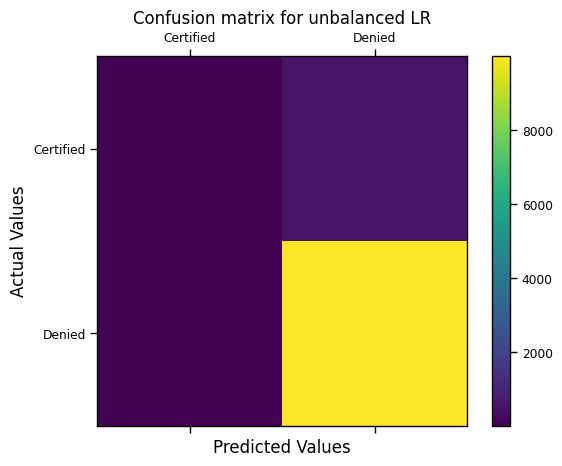

In [45]:
# Create a confusion matrix as a 2D array.

label_names = ['Certified', 'Denied']
cm = conf_mat # confusion_matrix(Y_test, LR_pred) #, label_names)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for unbalanced LR')
fig.colorbar(cax)
ax.set_xticklabels([''] + label_names)
ax.set_yticklabels([''] + label_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

RANDOM FOREST ON UNBALANCED DATA

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model = RandomForestClassifier()
model.fit(X_train, Y_train)
# Make predictions for the test set
RF_pred = model.predict(X_test)
# View accuracy score
accuracy_score(Y_test, RF_pred)
# View confusion matrix for test data and predictions
conf_mat= confusion_matrix(Y_test, RF_pred)
print("The confusion matrix is:", conf_mat)
print("The MSE of the predictions is:", MSE(Y_test, RF_pred))
# View the classification report for test data and predictions
print(classification_report(Y_test, RF_pred))

The confusion matrix is: [[ 141  423]
 [  90 9914]]
The MSE of the predictions is: 0.04854277062831189
              precision    recall  f1-score   support

           0       0.61      0.25      0.35       564
           1       0.96      0.99      0.97     10004

    accuracy                           0.95     10568
   macro avg       0.78      0.62      0.66     10568
weighted avg       0.94      0.95      0.94     10568



/tmp/ipykernel_4751/1002917944.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + label_names)
/tmp/ipykernel_4751/1002917944.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + label_names)


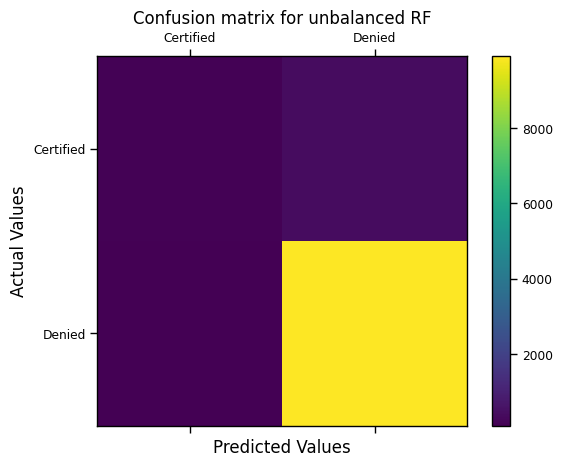

In [47]:
# Create a confusion matrix as a 2D array.

label_names = ['Certified', 'Denied']
cm = conf_mat
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for unbalanced RF')
fig.colorbar(cax)
ax.set_xticklabels([''] + label_names)
ax.set_yticklabels([''] + label_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

KNN FOR UNBALANCED DATA

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
KNN_pred = classifier.predict(X_test)
#Printing some Evaluation metrics
conf_mat= confusion_matrix(Y_test, KNN_pred)
print("The confusion matrix is:", conf_mat)
print("The MSE of the predictions is:", MSE(Y_test, KNN_pred))
print(classification_report(Y_test, KNN_pred))

The confusion matrix is: [[ 116  448]
 [  86 9918]]
The MSE of the predictions is: 0.050529901589704766
              precision    recall  f1-score   support

           0       0.57      0.21      0.30       564
           1       0.96      0.99      0.97     10004

    accuracy                           0.95     10568
   macro avg       0.77      0.60      0.64     10568
weighted avg       0.94      0.95      0.94     10568



[[ 116  448]
 [  86 9918]]


/tmp/ipykernel_4751/1091570241.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + label_names)
/tmp/ipykernel_4751/1091570241.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + label_names)


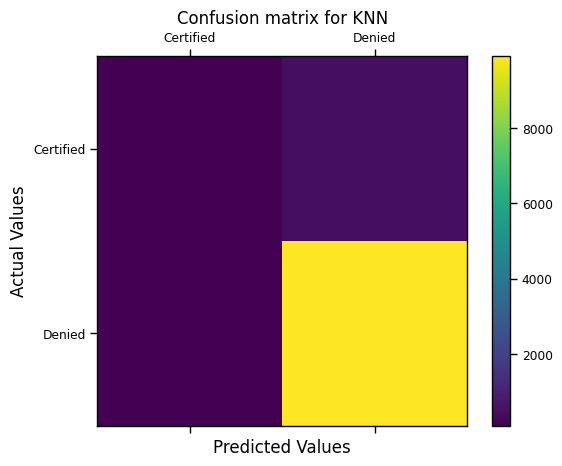

In [49]:
label_names = ['Certified', 'Denied']
cm = confusion_matrix(Y_test, KNN_pred) #, label_names)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for KNN')
fig.colorbar(cax)
ax.set_xticklabels([''] + label_names)
ax.set_yticklabels([''] + label_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

From the outputed values and the confusion matrix, we can see that our baseline model is meeting our expectations and all the ML algorithms are achieving similar results.

We are now going to correct the imbalance problem by re-adjusting the class distribution using Random over-sampling(ROSE) techniques.

**CORRECTING THE CLASS IMBALANCE PROBLEM PREPROCESSING OUR DATA**

In [50]:
# Solving Imbalance using ROSE

oversample = RandomOverSampler(sampling_strategy=0.5)
X_new, Y_new = oversample.fit_resample(X, Y)

In [51]:
unique, counts = np.unique(Y_new, return_counts=True)

print(counts)

[12465 24931]


In [52]:
#(X_train, Y_train), (X_test, Y_test) = df()

X_train,X_test, Y_train,Y_test = train_test_split(X_new, Y_new, test_size=0.4)





# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
Y_train = np.array(Y_train).flatten()
Y_test = np.array(Y_test).flatten()

#np.random.seed(0) # For reproducibility purposes

# Shuffle the order of the training examples.
indices = np.arange(X_train.shape[0])
shuffled_indices = np.random.permutation(indices)

X_train = np.array(X_train)[shuffled_indices]
Y_train = np.array(Y_train)[shuffled_indices]

In [53]:
# Show the data shapes.
print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape:', X_test.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: (22437, 8)
Y_train.shape: (22437,)
X_test.shape: (14959, 8)
Y_test.shape: (14959,)


In [54]:
# The number of certified and denied applicants after our sampling technique.
print('Number of certified applicants:', (Y_train == 1).sum())
print('Number of denied applicants:', (Y_train == 0).sum())

Number of certified applicants: 14904
Number of denied applicants: 7533


**ML MODELS FOR THE CORRECTED DATA**

LOGISTIC REGRESSION

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, Y_train)
#Make predictions on the testing data
LR_pred = model.predict(X_test)
# View accuracy score
accuracy_score(Y_test, LR_pred)
# View confusion matrix for test data and predictions
conf_mat = confusion_matrix(Y_test, LR_pred)
print("The confusion matrix is:", conf_mat)
print("The MSE of the predictions is:", MSE(Y_test, LR_pred))
# View the classification report for test data and predictions
print(classification_report(Y_test, LR_pred))

The confusion matrix is: [[2079 2853]
 [1080 8947]]
The MSE of the predictions is: 0.2629186442944047
              precision    recall  f1-score   support

           0       0.66      0.42      0.51      4932
           1       0.76      0.89      0.82     10027

    accuracy                           0.74     14959
   macro avg       0.71      0.66      0.67     14959
weighted avg       0.73      0.74      0.72     14959



/home/joshua/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/tmp/ipykernel_4751/1659929804.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + label_names)
/tmp/ipykernel_4751/1659929804.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + label_names)


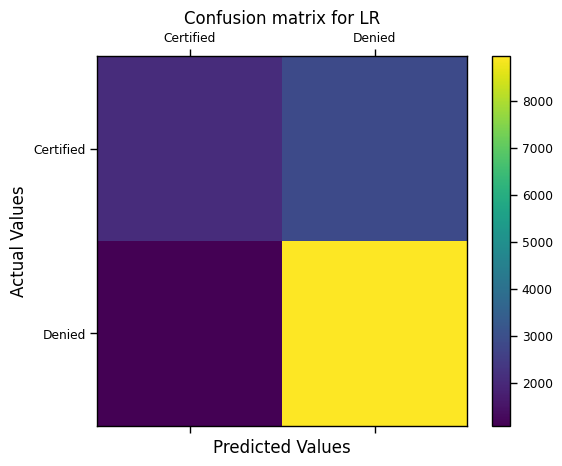

In [56]:
# Create a confusion matrix as a 2D array.

label_names = ['Certified', 'Denied']
cm = conf_mat 
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for LR')
fig.colorbar(cax)
ax.set_xticklabels([''] + label_names)
ax.set_yticklabels([''] + label_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

RANDOM FOREST

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model = RandomForestClassifier()
model.fit(X_train, Y_train)
# Make predictions for the test set
RF_pred = model.predict(X_test)
# View accuracy score
accuracy_score(Y_test, RF_pred)
# View confusion matrix for test data and predictions
conf_mat= confusion_matrix(Y_test, RF_pred)
print("The confusion matrix is:", conf_mat)
print("The MSE of the predictions is:", MSE(Y_test, RF_pred))
# View the classification report for test data and predictions
print(classification_report(Y_test, RF_pred))

The confusion matrix is: [[4723  209]
 [ 468 9559]]
The MSE of the predictions is: 0.04525703589812153
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4932
           1       0.98      0.95      0.97     10027

    accuracy                           0.95     14959
   macro avg       0.94      0.96      0.95     14959
weighted avg       0.96      0.95      0.96     14959



/tmp/ipykernel_4751/636834057.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + label_names)
/tmp/ipykernel_4751/636834057.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + label_names)


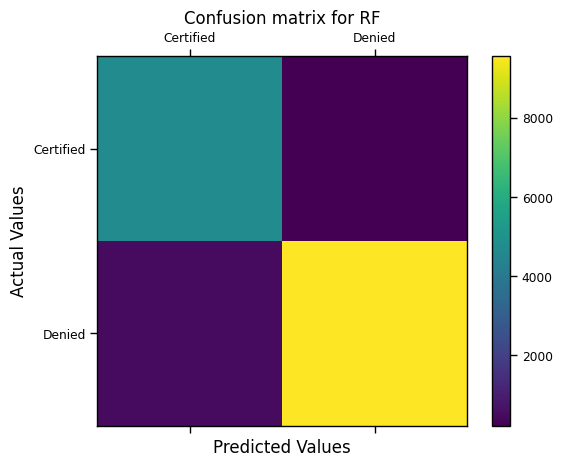

In [58]:
# Create a confusion matrix as a 2D array.

label_names = ['Certified', 'Denied']
cm = conf_mat
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for RF')
fig.colorbar(cax)
ax.set_xticklabels([''] + label_names)
ax.set_yticklabels([''] + label_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
KNN_pred = classifier.predict(X_test)
#Printing some Evaluation metrics
conf_mat= confusion_matrix(Y_test, KNN_pred)
print("The confusion matrix is:", conf_mat)
print("The MSE of the predictions is:", MSE(Y_test, KNN_pred))
print(classification_report(Y_test, KNN_pred))

The confusion matrix is: [[4451  481]
 [1452 8575]]
The MSE of the predictions is: 0.1292198676382111
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      4932
           1       0.95      0.86      0.90     10027

    accuracy                           0.87     14959
   macro avg       0.85      0.88      0.86     14959
weighted avg       0.88      0.87      0.87     14959



/tmp/ipykernel_4751/2876900033.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + label_names)
/tmp/ipykernel_4751/2876900033.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + label_names)


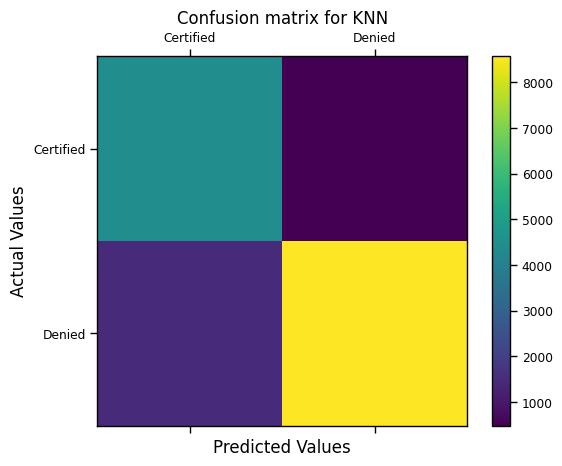

In [60]:
# Create a confusion matrix as a 2D array.

label_names = ['Certified', 'Denied']
cm = conf_mat
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for KNN')
fig.colorbar(cax)
ax.set_xticklabels([''] + label_names)
ax.set_yticklabels([''] + label_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()